# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographical_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.majority, past=Past.all, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 19760 substitutions for model Model(time=Time.continuous, source=Source.majority, past=Past.all, durl=Durl.all)


  0% (    1 of 19760) |            | Elapsed Time: 0:00:27 ETA:  6 days, 9:37:51

  0% (   70 of 19760) |                    | Elapsed Time: 0:00:28 ETA:  0:04:19

  0% (  147 of 19760) |                    | Elapsed Time: 0:00:30 ETA:  0:04:02

  1% (  220 of 19760) |                    | Elapsed Time: 0:00:31 ETA:  0:04:01

  1% (  247 of 19760) |                    | Elapsed Time: 0:00:31 ETA:  0:04:02

  1% (  318 of 19760) |                    | Elapsed Time: 0:00:32 ETA:  0:04:03

  1% (  392 of 19760) |                    | Elapsed Time: 0:00:33 ETA:  0:04:01

  2% (  465 of 19760) |                    | Elapsed Time: 0:00:34 ETA:  0:03:59

  2% (  494 of 19760) |                    | Elapsed Time: 0:00:34 ETA:  0:03:59

  2% (  567 of 19760) |                    | Elapsed Time: 0:00:35 ETA:  0:03:58

  3% (  640 of 19760) |                    | Elapsed Time: 0:00:36 ETA:  0:03:55

  3% (  711 of 19760) |                    | Elapsed Time: 0:00:37 ETA:  0:03:57

  3% (  741 of 19760) |                    | Elapsed Time: 0:00:38 ETA:  0:03:57

  4% (  810 of 19760) |                    | Elapsed Time: 0:00:39 ETA:  0:03:56

  4% (  881 of 19760) |                    | Elapsed Time: 0:00:40 ETA:  0:03:55

  4% (  950 of 19760) |                    | Elapsed Time: 0:00:41 ETA:  0:03:56

  5% (  988 of 19760) |#                   | Elapsed Time: 0:00:41 ETA:  0:03:56

  5% ( 1059 of 19760) |#                   | Elapsed Time: 0:00:42 ETA:  0:03:55

  5% ( 1125 of 19760) |#                   | Elapsed Time: 0:00:43 ETA:  0:03:58

  6% ( 1199 of 19760) |#                   | Elapsed Time: 0:00:44 ETA:  0:03:57

  6% ( 1235 of 19760) |#                   | Elapsed Time: 0:00:45 ETA:  0:03:56

  6% ( 1303 of 19760) |#                   | Elapsed Time: 0:00:46 ETA:  0:03:57

  6% ( 1374 of 19760) |#                   | Elapsed Time: 0:00:47 ETA:  0:03:55

  7% ( 1439 of 19760) |#                   | Elapsed Time: 0:00:48 ETA:  0:03:57

  7% ( 1482 of 19760) |#                   | Elapsed Time: 0:00:49 ETA:  0:04:01

  7% ( 1506 of 19760) |#                   | Elapsed Time: 0:00:50 ETA:  0:04:39

  7% ( 1565 of 19760) |#                   | Elapsed Time: 0:00:51 ETA:  0:04:47

  8% ( 1618 of 19760) |#                   | Elapsed Time: 0:00:52 ETA:  0:04:54

  8% ( 1679 of 19760) |#                   | Elapsed Time: 0:00:53 ETA:  0:05:03

  8% ( 1729 of 19760) |#                   | Elapsed Time: 0:00:54 ETA:  0:05:02

  9% ( 1799 of 19760) |#                   | Elapsed Time: 0:00:55 ETA:  0:05:00

  9% ( 1870 of 19760) |#                   | Elapsed Time: 0:00:56 ETA:  0:04:59

  9% ( 1936 of 19760) |#                   | Elapsed Time: 0:00:57 ETA:  0:04:58

 10% ( 1976 of 19760) |##                  | Elapsed Time: 0:00:57 ETA:  0:04:55

 10% ( 2033 of 19760) |##                  | Elapsed Time: 0:00:58 ETA:  0:04:18

 10% ( 2093 of 19760) |##                  | Elapsed Time: 0:00:59 ETA:  0:04:16

 10% ( 2162 of 19760) |##                  | Elapsed Time: 0:01:00 ETA:  0:04:06

 11% ( 2223 of 19760) |##                  | Elapsed Time: 0:01:01 ETA:  0:03:57

 11% ( 2293 of 19760) |##                  | Elapsed Time: 0:01:02 ETA:  0:03:53

 11% ( 2364 of 19760) |##                  | Elapsed Time: 0:01:03 ETA:  0:03:52

 12% ( 2423 of 19760) |##                  | Elapsed Time: 0:01:04 ETA:  0:03:57

 12% ( 2470 of 19760) |##                  | Elapsed Time: 0:01:05 ETA:  0:04:02

 12% ( 2529 of 19760) |##                  | Elapsed Time: 0:01:06 ETA:  0:04:04

 13% ( 2598 of 19760) |##                  | Elapsed Time: 0:01:07 ETA:  0:03:56

 13% ( 2662 of 19760) |##                  | Elapsed Time: 0:01:08 ETA:  0:03:53

 13% ( 2717 of 19760) |##                  | Elapsed Time: 0:01:09 ETA:  0:03:55

 14% ( 2782 of 19760) |##                  | Elapsed Time: 0:01:10 ETA:  0:04:00

 14% ( 2840 of 19760) |##                  | Elapsed Time: 0:01:11 ETA:  0:04:05

 14% ( 2900 of 19760) |##                  | Elapsed Time: 0:01:12 ETA:  0:04:11

 15% ( 2964 of 19760) |###                 | Elapsed Time: 0:01:13 ETA:  0:04:04

 15% ( 3031 of 19760) |###                 | Elapsed Time: 0:01:14 ETA:  0:03:56

 15% ( 3096 of 19760) |###                 | Elapsed Time: 0:01:15 ETA:  0:03:52

 16% ( 3163 of 19760) |###                 | Elapsed Time: 0:01:16 ETA:  0:03:52

 16% ( 3211 of 19760) |###                 | Elapsed Time: 0:01:17 ETA:  0:03:49

 16% ( 3274 of 19760) |###                 | Elapsed Time: 0:01:18 ETA:  0:03:48

 16% ( 3324 of 19760) |###                 | Elapsed Time: 0:01:19 ETA:  0:03:56

 17% ( 3378 of 19760) |###                 | Elapsed Time: 0:01:20 ETA:  0:03:57

 17% ( 3443 of 19760) |###                 | Elapsed Time: 0:01:21 ETA:  0:03:54

 17% ( 3458 of 19760) |###                 | Elapsed Time: 0:01:21 ETA:  0:03:58

 17% ( 3520 of 19760) |###                 | Elapsed Time: 0:01:22 ETA:  0:04:01

 18% ( 3588 of 19760) |###                 | Elapsed Time: 0:01:23 ETA:  0:03:58

 18% ( 3641 of 19760) |###                 | Elapsed Time: 0:01:24 ETA:  0:04:07

 18% ( 3705 of 19760) |###                 | Elapsed Time: 0:01:25 ETA:  0:04:05

 19% ( 3773 of 19760) |###                 | Elapsed Time: 0:01:26 ETA:  0:04:00

 19% ( 3839 of 19760) |###                 | Elapsed Time: 0:01:27 ETA:  0:03:49

 19% ( 3906 of 19760) |###                 | Elapsed Time: 0:01:28 ETA:  0:03:40

 20% ( 3952 of 19760) |####                | Elapsed Time: 0:01:29 ETA:  0:03:37

 20% ( 4021 of 19760) |####                | Elapsed Time: 0:01:30 ETA:  0:03:33

 20% ( 4085 of 19760) |####                | Elapsed Time: 0:01:31 ETA:  0:03:31

 20% ( 4142 of 19760) |####                | Elapsed Time: 0:01:32 ETA:  0:03:36

 21% ( 4199 of 19760) |####                | Elapsed Time: 0:01:32 ETA:  0:03:26

 21% ( 4268 of 19760) |####                | Elapsed Time: 0:01:33 ETA:  0:03:25

 21% ( 4331 of 19760) |####                | Elapsed Time: 0:01:34 ETA:  0:03:27

 22% ( 4402 of 19760) |####                | Elapsed Time: 0:01:35 ETA:  0:03:23

 22% ( 4446 of 19760) |####                | Elapsed Time: 0:01:36 ETA:  0:03:23

 22% ( 4507 of 19760) |####                | Elapsed Time: 0:01:37 ETA:  0:03:26

 23% ( 4577 of 19760) |####                | Elapsed Time: 0:01:38 ETA:  0:03:24

 23% ( 4645 of 19760) |####                | Elapsed Time: 0:01:39 ETA:  0:03:21

 23% ( 4678 of 19760) |####                | Elapsed Time: 0:01:41 ETA:  0:03:55

 23% ( 4693 of 19760) |####                | Elapsed Time: 0:01:41 ETA:  0:03:59

 24% ( 4752 of 19760) |####                | Elapsed Time: 0:01:42 ETA:  0:04:06

 24% ( 4819 of 19760) |####                | Elapsed Time: 0:01:43 ETA:  0:04:02

 24% ( 4888 of 19760) |####                | Elapsed Time: 0:01:44 ETA:  0:04:02

 25% ( 4940 of 19760) |#####               | Elapsed Time: 0:01:45 ETA:  0:04:00

 25% ( 5004 of 19760) |#####               | Elapsed Time: 0:01:46 ETA:  0:03:57

 25% ( 5070 of 19760) |#####               | Elapsed Time: 0:01:47 ETA:  0:03:59

 26% ( 5141 of 19760) |#####               | Elapsed Time: 0:01:48 ETA:  0:03:55

 26% ( 5187 of 19760) |#####               | Elapsed Time: 0:01:48 ETA:  0:03:10

 26% ( 5262 of 19760) |#####               | Elapsed Time: 0:01:49 ETA:  0:03:05

 26% ( 5334 of 19760) |#####               | Elapsed Time: 0:01:50 ETA:  0:02:57

 27% ( 5395 of 19760) |#####               | Elapsed Time: 0:01:51 ETA:  0:02:59

 27% ( 5434 of 19760) |#####               | Elapsed Time: 0:01:52 ETA:  0:02:59

 27% ( 5511 of 19760) |#####               | Elapsed Time: 0:01:53 ETA:  0:02:53

 28% ( 5579 of 19760) |#####               | Elapsed Time: 0:01:54 ETA:  0:02:50

 28% ( 5636 of 19760) |#####               | Elapsed Time: 0:01:55 ETA:  0:02:54

 28% ( 5681 of 19760) |#####               | Elapsed Time: 0:01:56 ETA:  0:02:56

 29% ( 5737 of 19760) |#####               | Elapsed Time: 0:01:57 ETA:  0:03:02

 29% ( 5793 of 19760) |#####               | Elapsed Time: 0:01:58 ETA:  0:03:12

 29% ( 5860 of 19760) |#####               | Elapsed Time: 0:01:59 ETA:  0:03:14

 30% ( 5928 of 19760) |######              | Elapsed Time: 0:02:00 ETA:  0:03:04

 30% ( 6004 of 19760) |######              | Elapsed Time: 0:02:01 ETA:  0:02:59

 30% ( 6075 of 19760) |######              | Elapsed Time: 0:02:02 ETA:  0:03:02

 31% ( 6144 of 19760) |######              | Elapsed Time: 0:02:03 ETA:  0:03:00

 31% ( 6175 of 19760) |######              | Elapsed Time: 0:02:03 ETA:  0:02:52

 31% ( 6240 of 19760) |######              | Elapsed Time: 0:02:04 ETA:  0:02:51

 31% ( 6296 of 19760) |######              | Elapsed Time: 0:02:05 ETA:  0:02:50

 32% ( 6366 of 19760) |######              | Elapsed Time: 0:02:06 ETA:  0:02:41

 32% ( 6422 of 19760) |######              | Elapsed Time: 0:02:07 ETA:  0:02:40

 32% ( 6492 of 19760) |######              | Elapsed Time: 0:02:08 ETA:  0:02:42

 33% ( 6561 of 19760) |######              | Elapsed Time: 0:02:09 ETA:  0:02:45

 33% ( 6636 of 19760) |######              | Elapsed Time: 0:02:10 ETA:  0:02:42

 33% ( 6669 of 19760) |######              | Elapsed Time: 0:02:10 ETA:  0:02:40

 34% ( 6744 of 19760) |######              | Elapsed Time: 0:02:12 ETA:  0:02:37

 34% ( 6821 of 19760) |######              | Elapsed Time: 0:02:13 ETA:  0:02:30

 34% ( 6887 of 19760) |######              | Elapsed Time: 0:02:14 ETA:  0:02:24

 35% ( 6916 of 19760) |#######             | Elapsed Time: 0:02:14 ETA:  0:02:26

 35% ( 6981 of 19760) |#######             | Elapsed Time: 0:02:15 ETA:  0:02:26

 35% ( 7057 of 19760) |#######             | Elapsed Time: 0:02:16 ETA:  0:02:22

 36% ( 7117 of 19760) |#######             | Elapsed Time: 0:02:17 ETA:  0:02:26

 36% ( 7163 of 19760) |#######             | Elapsed Time: 0:02:18 ETA:  0:02:26

 36% ( 7235 of 19760) |#######             | Elapsed Time: 0:02:19 ETA:  0:02:25

 36% ( 7307 of 19760) |#######             | Elapsed Time: 0:02:20 ETA:  0:02:26

 37% ( 7379 of 19760) |#######             | Elapsed Time: 0:02:21 ETA:  0:02:28

 37% ( 7410 of 19760) |#######             | Elapsed Time: 0:02:21 ETA:  0:02:25

 37% ( 7472 of 19760) |#######             | Elapsed Time: 0:02:22 ETA:  0:02:26

 38% ( 7539 of 19760) |#######             | Elapsed Time: 0:02:23 ETA:  0:02:24

 38% ( 7604 of 19760) |#######             | Elapsed Time: 0:02:24 ETA:  0:02:29

 38% ( 7657 of 19760) |#######             | Elapsed Time: 0:02:25 ETA:  0:02:21

 39% ( 7722 of 19760) |#######             | Elapsed Time: 0:02:26 ETA:  0:02:24

 39% ( 7786 of 19760) |#######             | Elapsed Time: 0:02:27 ETA:  0:02:26

 39% ( 7846 of 19760) |#######             | Elapsed Time: 0:02:28 ETA:  0:02:32

 40% ( 7904 of 19760) |########            | Elapsed Time: 0:02:29 ETA:  0:02:32

 40% ( 7970 of 19760) |########            | Elapsed Time: 0:02:30 ETA:  0:02:32

 40% ( 8043 of 19760) |########            | Elapsed Time: 0:02:31 ETA:  0:02:26

 41% ( 8112 of 19760) |########            | Elapsed Time: 0:02:32 ETA:  0:02:24

 41% ( 8151 of 19760) |########            | Elapsed Time: 0:02:32 ETA:  0:02:22

 41% ( 8223 of 19760) |########            | Elapsed Time: 0:02:33 ETA:  0:02:21

 41% ( 8291 of 19760) |########            | Elapsed Time: 0:02:34 ETA:  0:02:19

 42% ( 8364 of 19760) |########            | Elapsed Time: 0:02:35 ETA:  0:02:14

 42% ( 8398 of 19760) |########            | Elapsed Time: 0:02:36 ETA:  0:02:08

 42% ( 8469 of 19760) |########            | Elapsed Time: 0:02:37 ETA:  0:02:07

 43% ( 8527 of 19760) |########            | Elapsed Time: 0:02:38 ETA:  0:02:10

 43% ( 8587 of 19760) |########            | Elapsed Time: 0:02:39 ETA:  0:02:16

 43% ( 8627 of 19760) |########            | Elapsed Time: 0:02:41 ETA:  0:03:14

 43% ( 8645 of 19760) |########            | Elapsed Time: 0:02:41 ETA:  0:03:16

 44% ( 8705 of 19760) |########            | Elapsed Time: 0:02:42 ETA:  0:03:24

 44% ( 8763 of 19760) |########            | Elapsed Time: 0:02:43 ETA:  0:03:31

 44% ( 8819 of 19760) |########            | Elapsed Time: 0:02:44 ETA:  0:03:44

 45% ( 8892 of 19760) |#########           | Elapsed Time: 0:02:45 ETA:  0:03:32

 45% ( 8962 of 19760) |#########           | Elapsed Time: 0:02:46 ETA:  0:03:32

 45% ( 9024 of 19760) |#########           | Elapsed Time: 0:02:47 ETA:  0:03:28

 45% ( 9085 of 19760) |#########           | Elapsed Time: 0:02:48 ETA:  0:03:25

 46% ( 9139 of 19760) |#########           | Elapsed Time: 0:02:49 ETA:  0:02:23

 46% ( 9203 of 19760) |#########           | Elapsed Time: 0:02:50 ETA:  0:02:22

 46% ( 9274 of 19760) |#########           | Elapsed Time: 0:02:51 ETA:  0:02:15

 47% ( 9342 of 19760) |#########           | Elapsed Time: 0:02:52 ETA:  0:02:08

 47% ( 9386 of 19760) |#########           | Elapsed Time: 0:02:53 ETA:  0:02:01

 47% ( 9448 of 19760) |#########           | Elapsed Time: 0:02:54 ETA:  0:02:07

 48% ( 9517 of 19760) |#########           | Elapsed Time: 0:02:55 ETA:  0:02:06

 48% ( 9577 of 19760) |#########           | Elapsed Time: 0:02:56 ETA:  0:02:06

 48% ( 9633 of 19760) |#########           | Elapsed Time: 0:02:57 ETA:  0:02:03

 49% ( 9695 of 19760) |#########           | Elapsed Time: 0:02:58 ETA:  0:02:04

 49% ( 9764 of 19760) |#########           | Elapsed Time: 0:02:59 ETA:  0:02:01

 49% ( 9833 of 19760) |#########           | Elapsed Time: 0:03:00 ETA:  0:02:01

 50% ( 9880 of 19760) |##########          | Elapsed Time: 0:03:00 ETA:  0:02:05

 50% ( 9945 of 19760) |##########          | Elapsed Time: 0:03:01 ETA:  0:02:05

 50% (10017 of 19760) |##########          | Elapsed Time: 0:03:02 ETA:  0:01:59

 51% (10078 of 19760) |##########          | Elapsed Time: 0:03:03 ETA:  0:02:02

 51% (10127 of 19760) |##########          | Elapsed Time: 0:03:04 ETA:  0:01:58

 51% (10199 of 19760) |##########          | Elapsed Time: 0:03:05 ETA:  0:01:53

 51% (10264 of 19760) |##########          | Elapsed Time: 0:03:06 ETA:  0:01:51

 52% (10335 of 19760) |##########          | Elapsed Time: 0:03:07 ETA:  0:01:49

 52% (10374 of 19760) |##########          | Elapsed Time: 0:03:08 ETA:  0:01:51

 52% (10443 of 19760) |##########          | Elapsed Time: 0:03:09 ETA:  0:01:46

 53% (10506 of 19760) |##########          | Elapsed Time: 0:03:10 ETA:  0:01:46

 53% (10569 of 19760) |##########          | Elapsed Time: 0:03:11 ETA:  0:01:50

 53% (10621 of 19760) |##########          | Elapsed Time: 0:03:12 ETA:  0:01:47

 54% (10689 of 19760) |##########          | Elapsed Time: 0:03:13 ETA:  0:01:45

 54% (10756 of 19760) |##########          | Elapsed Time: 0:03:14 ETA:  0:01:47

 54% (10829 of 19760) |##########          | Elapsed Time: 0:03:15 ETA:  0:01:42

 55% (10868 of 19760) |###########         | Elapsed Time: 0:03:15 ETA:  0:01:42

 55% (10938 of 19760) |###########         | Elapsed Time: 0:03:16 ETA:  0:01:38

 55% (11006 of 19760) |###########         | Elapsed Time: 0:03:17 ETA:  0:01:37

 56% (11069 of 19760) |###########         | Elapsed Time: 0:03:18 ETA:  0:01:36

 56% (11115 of 19760) |###########         | Elapsed Time: 0:03:19 ETA:  0:01:33

 56% (11191 of 19760) |###########         | Elapsed Time: 0:03:20 ETA:  0:01:26

 56% (11260 of 19760) |###########         | Elapsed Time: 0:03:21 ETA:  0:01:25

 57% (11332 of 19760) |###########         | Elapsed Time: 0:03:22 ETA:  0:01:21

 57% (11362 of 19760) |###########         | Elapsed Time: 0:03:22 ETA:  0:01:22

 57% (11437 of 19760) |###########         | Elapsed Time: 0:03:23 ETA:  0:01:19

 58% (11510 of 19760) |###########         | Elapsed Time: 0:03:24 ETA:  0:01:16

 58% (11578 of 19760) |###########         | Elapsed Time: 0:03:25 ETA:  0:01:15

 58% (11609 of 19760) |###########         | Elapsed Time: 0:03:26 ETA:  0:01:10

 59% (11683 of 19760) |###########         | Elapsed Time: 0:03:27 ETA:  0:01:07

 59% (11754 of 19760) |###########         | Elapsed Time: 0:03:28 ETA:  0:01:08

 59% (11823 of 19760) |###########         | Elapsed Time: 0:03:29 ETA:  0:01:07

 60% (11856 of 19760) |############        | Elapsed Time: 0:03:29 ETA:  0:01:07

 60% (11927 of 19760) |############        | Elapsed Time: 0:03:30 ETA:  0:01:07

 60% (12001 of 19760) |############        | Elapsed Time: 0:03:31 ETA:  0:01:06

 61% (12078 of 19760) |############        | Elapsed Time: 0:03:32 ETA:  0:01:03

 61% (12103 of 19760) |############        | Elapsed Time: 0:03:33 ETA:  0:01:01

 61% (12179 of 19760) |############        | Elapsed Time: 0:03:34 ETA:  0:00:58

 62% (12261 of 19760) |############        | Elapsed Time: 0:03:35 ETA:  0:00:53

 62% (12350 of 19760) |############        | Elapsed Time: 0:03:36 ETA:  0:00:46

 62% (12426 of 19760) |############        | Elapsed Time: 0:03:37 ETA:  0:00:44

 63% (12503 of 19760) |############        | Elapsed Time: 0:03:38 ETA:  0:00:40

 63% (12576 of 19760) |############        | Elapsed Time: 0:03:39 ETA:  0:00:40

 63% (12597 of 19760) |############        | Elapsed Time: 0:03:39 ETA:  0:00:40

 64% (12661 of 19760) |############        | Elapsed Time: 0:03:40 ETA:  0:00:44

 64% (12734 of 19760) |############        | Elapsed Time: 0:03:41 ETA:  0:00:45

 64% (12807 of 19760) |############        | Elapsed Time: 0:03:42 ETA:  0:00:48

 65% (12844 of 19760) |#############       | Elapsed Time: 0:03:43 ETA:  0:00:49

 65% (12916 of 19760) |#############       | Elapsed Time: 0:03:44 ETA:  0:00:49

 65% (12986 of 19760) |#############       | Elapsed Time: 0:03:45 ETA:  0:00:51

 66% (13055 of 19760) |#############       | Elapsed Time: 0:03:46 ETA:  0:00:54

 66% (13091 of 19760) |#############       | Elapsed Time: 0:03:46 ETA:  0:00:56

 66% (13158 of 19760) |#############       | Elapsed Time: 0:03:47 ETA:  0:00:57

 66% (13235 of 19760) |#############       | Elapsed Time: 0:03:48 ETA:  0:00:50

 67% (13300 of 19760) |#############       | Elapsed Time: 0:03:49 ETA:  0:00:52

 67% (13338 of 19760) |#############       | Elapsed Time: 0:03:50 ETA:  0:00:55

 67% (13406 of 19760) |#############       | Elapsed Time: 0:03:51 ETA:  0:00:56

 68% (13477 of 19760) |#############       | Elapsed Time: 0:03:52 ETA:  0:00:55

 68% (13492 of 19760) |#############       | Elapsed Time: 0:03:54 ETA:  0:02:05

 68% (13557 of 19760) |#############       | Elapsed Time: 0:03:55 ETA:  0:02:07

 68% (13585 of 19760) |#############       | Elapsed Time: 0:03:55 ETA:  0:02:08

 69% (13656 of 19760) |#############       | Elapsed Time: 0:03:56 ETA:  0:02:05

 69% (13723 of 19760) |#############       | Elapsed Time: 0:03:57 ETA:  0:02:11

 69% (13789 of 19760) |#############       | Elapsed Time: 0:03:59 ETA:  0:02:10

 70% (13832 of 19760) |##############      | Elapsed Time: 0:03:59 ETA:  0:02:05

 70% (13910 of 19760) |##############      | Elapsed Time: 0:04:00 ETA:  0:01:57

 70% (13986 of 19760) |##############      | Elapsed Time: 0:04:01 ETA:  0:01:52

 71% (14059 of 19760) |##############      | Elapsed Time: 0:04:02 ETA:  0:00:39

 71% (14079 of 19760) |##############      | Elapsed Time: 0:04:02 ETA:  0:00:35

 71% (14152 of 19760) |##############      | Elapsed Time: 0:04:03 ETA:  0:00:32

 71% (14224 of 19760) |##############      | Elapsed Time: 0:04:04 ETA:  0:00:31

 72% (14304 of 19760) |##############      | Elapsed Time: 0:04:05 ETA:  0:00:23

 72% (14326 of 19760) |##############      | Elapsed Time: 0:04:06 ETA:  0:00:19

 72% (14403 of 19760) |##############      | Elapsed Time: 0:04:07 ETA:  0:00:16

 73% (14476 of 19760) |##############      | Elapsed Time: 0:04:08 ETA:  0:00:18

 73% (14550 of 19760) |##############      | Elapsed Time: 0:04:09 ETA:  0:00:18

 73% (14573 of 19760) |##############      | Elapsed Time: 0:04:09 ETA:  0:00:20

 74% (14649 of 19760) |##############      | Elapsed Time: 0:04:10 ETA:  0:00:18

 74% (14724 of 19760) |##############      | Elapsed Time: 0:04:11 ETA:  0:00:16

 74% (14796 of 19760) |##############      | Elapsed Time: 0:04:12 ETA:  0:00:15

 75% (14820 of 19760) |###############     | Elapsed Time: 0:04:12 ETA:  0:00:18

 75% (14876 of 19760) |###############     | Elapsed Time: 0:04:13 ETA:  0:00:25

 75% (14945 of 19760) |###############     | Elapsed Time: 0:04:15 ETA:  0:00:28

 76% (15019 of 19760) |###############     | Elapsed Time: 0:04:16 ETA:  0:00:26

 76% (15067 of 19760) |###############     | Elapsed Time: 0:04:16 ETA:  0:00:29

 76% (15137 of 19760) |###############     | Elapsed Time: 0:04:17 ETA:  0:00:26

 76% (15210 of 19760) |###############     | Elapsed Time: 0:04:18 ETA:  0:00:26

 77% (15281 of 19760) |###############     | Elapsed Time: 0:04:19 ETA:  0:00:27

 77% (15314 of 19760) |###############     | Elapsed Time: 0:04:20 ETA:  0:00:27

 77% (15376 of 19760) |###############     | Elapsed Time: 0:04:21 ETA:  0:00:30

 78% (15434 of 19760) |###############     | Elapsed Time: 0:04:22 ETA:  0:00:28

 78% (15499 of 19760) |###############     | Elapsed Time: 0:04:23 ETA:  0:00:29

 78% (15561 of 19760) |###############     | Elapsed Time: 0:04:24 ETA:  0:00:34

 79% (15628 of 19760) |###############     | Elapsed Time: 0:04:25 ETA:  0:00:33

 79% (15696 of 19760) |###############     | Elapsed Time: 0:04:26 ETA:  0:00:32

 79% (15764 of 19760) |###############     | Elapsed Time: 0:04:27 ETA:  0:00:34

 80% (15808 of 19760) |################    | Elapsed Time: 0:04:27 ETA:  0:00:34

 80% (15884 of 19760) |################    | Elapsed Time: 0:04:28 ETA:  0:00:29

 80% (15964 of 19760) |################    | Elapsed Time: 0:04:29 ETA:  0:00:19

 81% (16038 of 19760) |################    | Elapsed Time: 0:04:30 ETA:  0:00:10

 81% (16055 of 19760) |################    | Elapsed Time: 0:04:31 ETA:  0:00:08

 81% (16129 of 19760) |################    | Elapsed Time: 0:04:32 ETA:  0:00:02

 81% (16203 of 19760) |################    | Elapsed Time: 0:04:33 ETA:  0:00:00

 82% (16278 of 19760) |################    | Elapsed Time: 0:04:34 ETA:  0:00:00

 82% (16302 of 19760) |################    | Elapsed Time: 0:04:34 ETA:  0:00:00

 82% (16372 of 19760) |################    | Elapsed Time: 0:04:35 ETA:  0:00:00

 83% (16447 of 19760) |################    | Elapsed Time: 0:04:36 ETA:  0:00:00

 83% (16520 of 19760) |################    | Elapsed Time: 0:04:37 ETA:  0:00:00

 83% (16549 of 19760) |################    | Elapsed Time: 0:04:37 ETA:  0:00:00

 84% (16621 of 19760) |################    | Elapsed Time: 0:04:38 ETA:  0:00:00

 84% (16696 of 19760) |################    | Elapsed Time: 0:04:39 ETA:  0:00:00

 84% (16775 of 19760) |################    | Elapsed Time: 0:04:40 ETA:  0:00:00

 85% (16796 of 19760) |#################   | Elapsed Time: 0:04:41 ETA:  0:00:00

 85% (16870 of 19760) |#################   | Elapsed Time: 0:04:42 ETA:  0:00:00

 85% (16933 of 19760) |#################   | Elapsed Time: 0:04:43 ETA:  0:00:00

 86% (17005 of 19760) |#################   | Elapsed Time: 0:04:44 ETA:  0:00:00

 86% (17043 of 19760) |#################   | Elapsed Time: 0:04:44 ETA:  0:00:00

 86% (17109 of 19760) |#################   | Elapsed Time: 0:04:45 ETA:  0:00:00

 86% (17176 of 19760) |#################   | Elapsed Time: 0:04:46 ETA:  0:00:00

 87% (17252 of 19760) |#################   | Elapsed Time: 0:04:47 ETA:  0:00:00

 87% (17290 of 19760) |#################   | Elapsed Time: 0:04:48 ETA:  0:00:00

 87% (17365 of 19760) |#################   | Elapsed Time: 0:04:49 ETA:  0:00:00

 88% (17445 of 19760) |#################   | Elapsed Time: 0:04:50 ETA:  0:00:00

 88% (17515 of 19760) |#################   | Elapsed Time: 0:04:51 ETA:  0:00:00

 88% (17537 of 19760) |#################   | Elapsed Time: 0:04:51 ETA:  0:00:00

 89% (17603 of 19760) |#################   | Elapsed Time: 0:04:52 ETA:  0:00:00

 89% (17674 of 19760) |#################   | Elapsed Time: 0:04:53 ETA:  0:00:00

 89% (17750 of 19760) |#################   | Elapsed Time: 0:04:54 ETA:  0:00:00

 90% (17784 of 19760) |##################  | Elapsed Time: 0:04:55 ETA:  0:00:00

 90% (17854 of 19760) |##################  | Elapsed Time: 0:04:56 ETA:  0:00:00

 90% (17926 of 19760) |##################  | Elapsed Time: 0:04:57 ETA:  0:00:00

 91% (17998 of 19760) |##################  | Elapsed Time: 0:04:58 ETA:  0:00:00

 91% (18031 of 19760) |##################  | Elapsed Time: 0:04:58 ETA:  0:00:00

 91% (18105 of 19760) |##################  | Elapsed Time: 0:04:59 ETA:  0:00:00

 92% (18184 of 19760) |##################  | Elapsed Time: 0:05:00 ETA:  0:00:00

 92% (18254 of 19760) |##################  | Elapsed Time: 0:05:01 ETA:  0:00:00

 92% (18278 of 19760) |##################  | Elapsed Time: 0:05:01 ETA:  0:00:00

 92% (18351 of 19760) |##################  | Elapsed Time: 0:05:02 ETA:  0:00:00

 93% (18416 of 19760) |##################  | Elapsed Time: 0:05:03 ETA:  0:00:00

 93% (18486 of 19760) |##################  | Elapsed Time: 0:05:04 ETA:  0:00:00

 93% (18525 of 19760) |##################  | Elapsed Time: 0:05:05 ETA:  0:00:00

 94% (18596 of 19760) |##################  | Elapsed Time: 0:05:06 ETA:  0:00:00

 94% (18668 of 19760) |##################  | Elapsed Time: 0:05:07 ETA:  0:00:00

 94% (18740 of 19760) |##################  | Elapsed Time: 0:05:08 ETA:  0:00:00

 95% (18772 of 19760) |################### | Elapsed Time: 0:05:09 ETA:  0:00:00

 95% (18844 of 19760) |################### | Elapsed Time: 0:05:10 ETA:  0:00:00

 95% (18912 of 19760) |################### | Elapsed Time: 0:05:11 ETA:  0:00:00

 96% (18987 of 19760) |################### | Elapsed Time: 0:05:12 ETA:  0:00:00

 96% (19019 of 19760) |################### | Elapsed Time: 0:05:12 ETA:  0:00:00

 96% (19094 of 19760) |################### | Elapsed Time: 0:05:13 ETA:  0:00:00

 97% (19173 of 19760) |################### | Elapsed Time: 0:05:14 ETA:  0:00:00

 97% (19246 of 19760) |################### | Elapsed Time: 0:05:15 ETA:  0:00:00

 97% (19266 of 19760) |################### | Elapsed Time: 0:05:15 ETA:  0:00:00

 97% (19343 of 19760) |################### | Elapsed Time: 0:05:16 ETA:  0:00:00

 98% (19417 of 19760) |################### | Elapsed Time: 0:05:17 ETA:  0:00:00

 98% (19469 of 19760) |################### | Elapsed Time: 0:05:20 ETA:  0:00:22

 98% (19513 of 19760) |################### | Elapsed Time: 0:05:21 ETA:  0:00:27

 99% (19581 of 19760) |################### | Elapsed Time: 0:05:22 ETA:  0:00:23

 99% (19651 of 19760) |################### | Elapsed Time: 0:05:23 ETA:  0:00:25

 99% (19719 of 19760) |################### | Elapsed Time: 0:05:24 ETA:  0:00:31

100% (19760 of 19760) |####################| Elapsed Time: 0:05:24 Time: 0:05:24


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(x, y, **kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data[x + rel]
    y = data[y + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / h0s.mean(), '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / h0s.mean(), (values - h0ns + cis) / h0s.mean(),
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

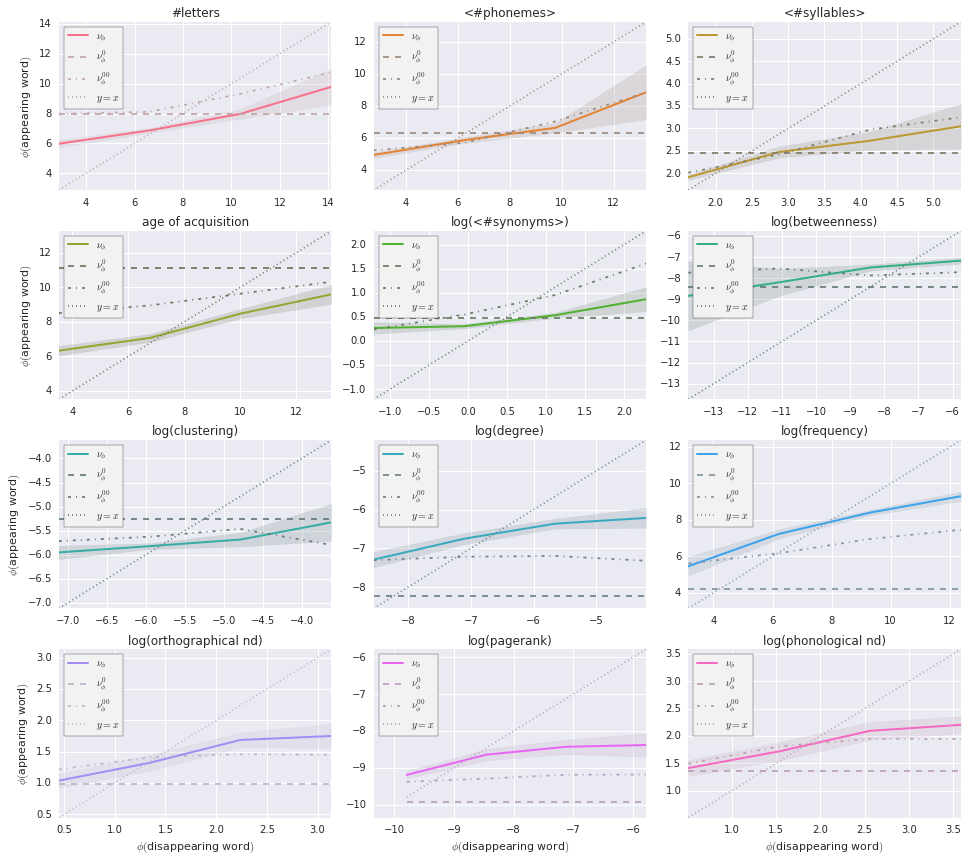

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

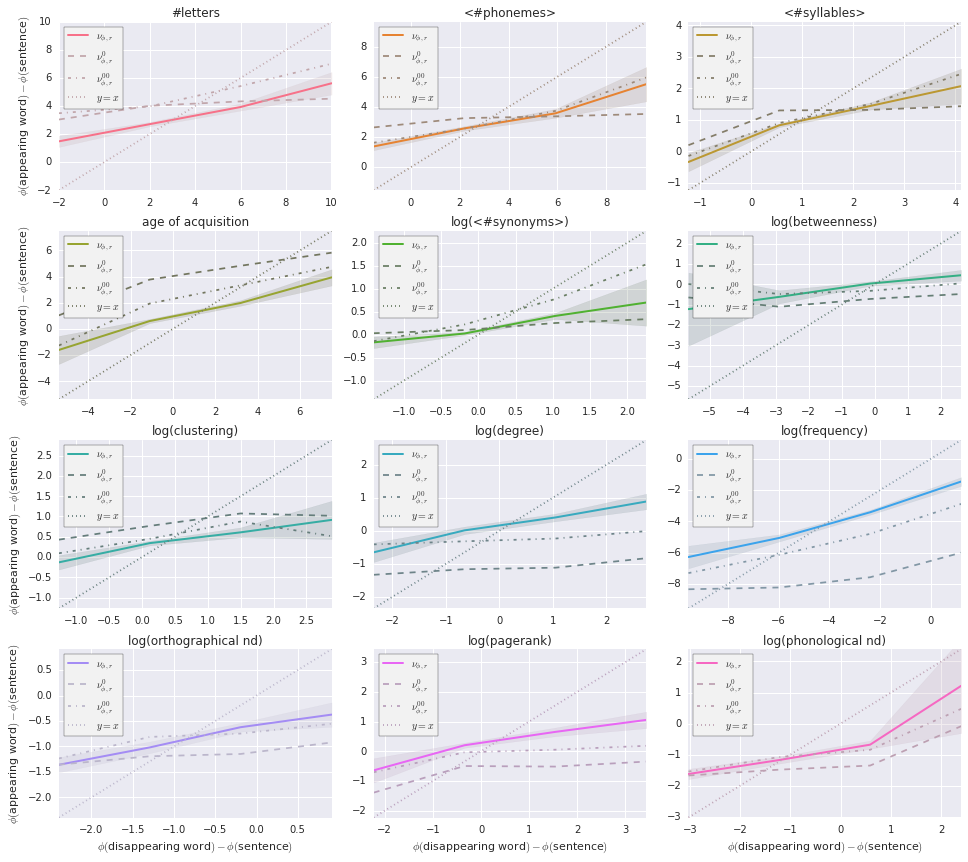

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, 'source', 'destination', relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

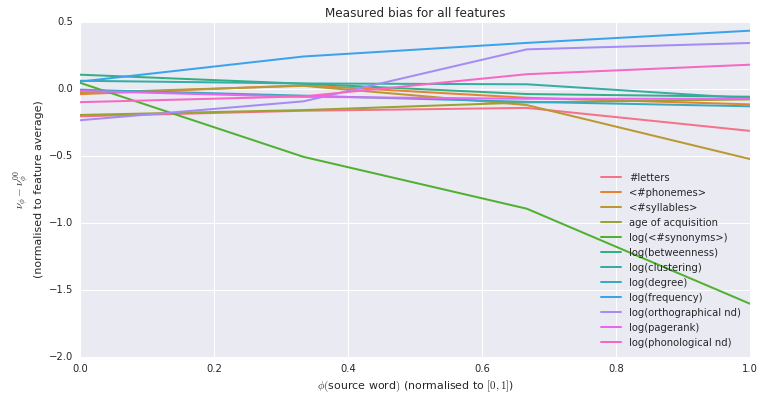

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

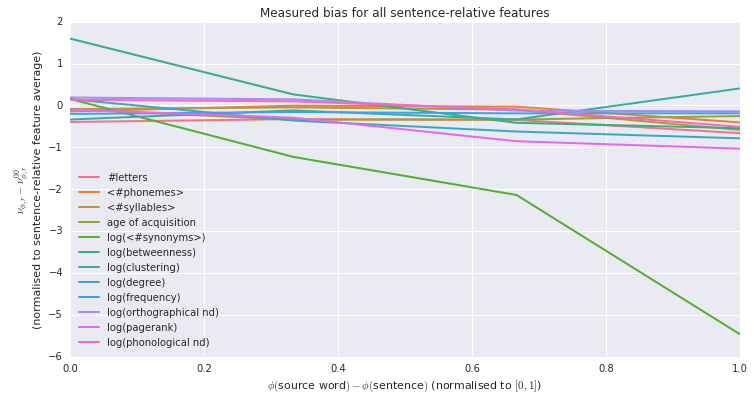

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

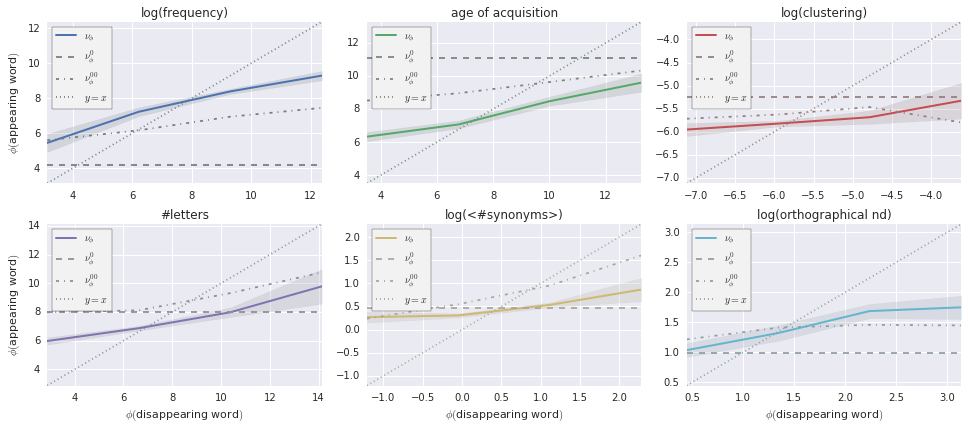

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

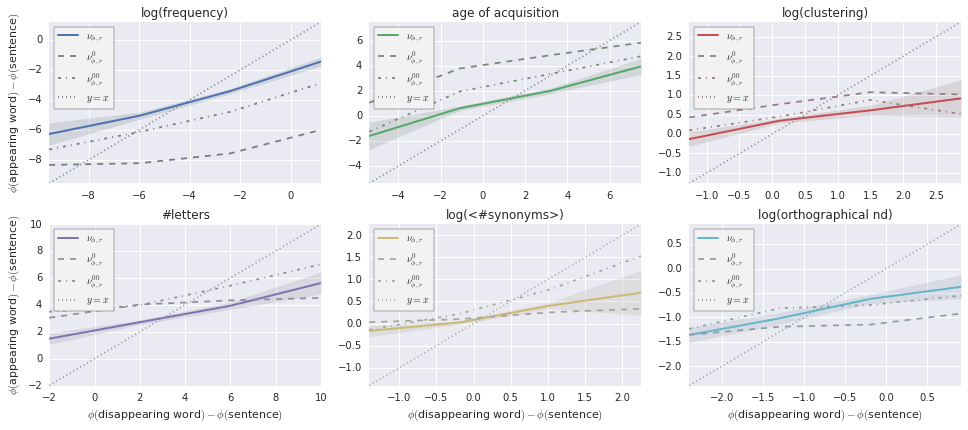

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, 'source', 'destination', relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

And the same with features relative to sentence average

Now $\nu_{\phi} - \nu_{\phi}^{00}$

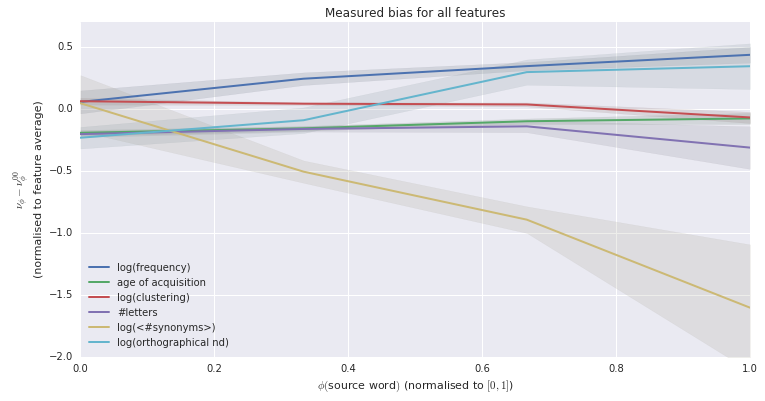

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

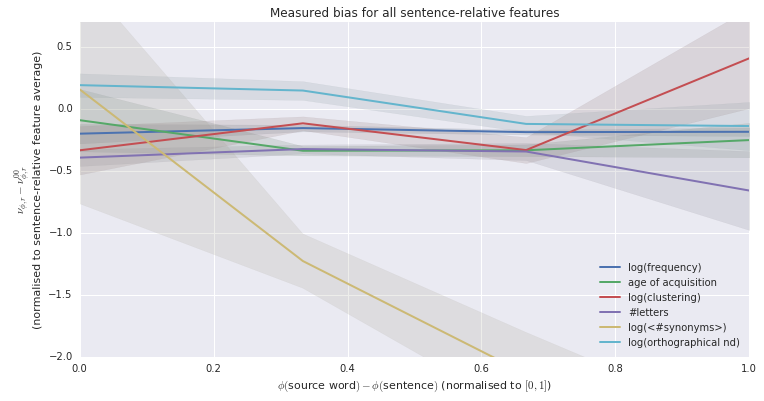

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


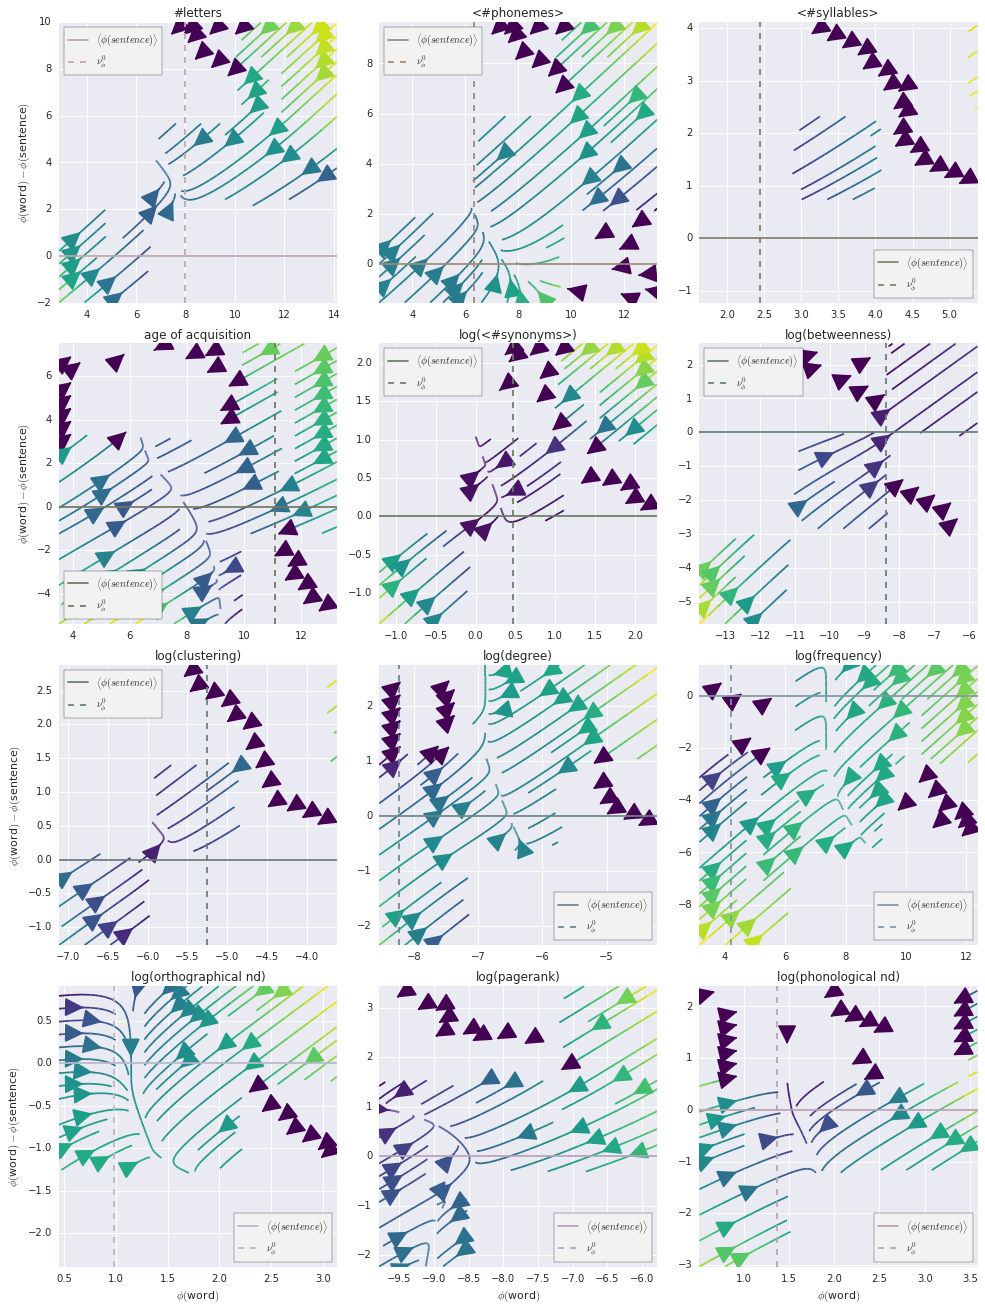

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


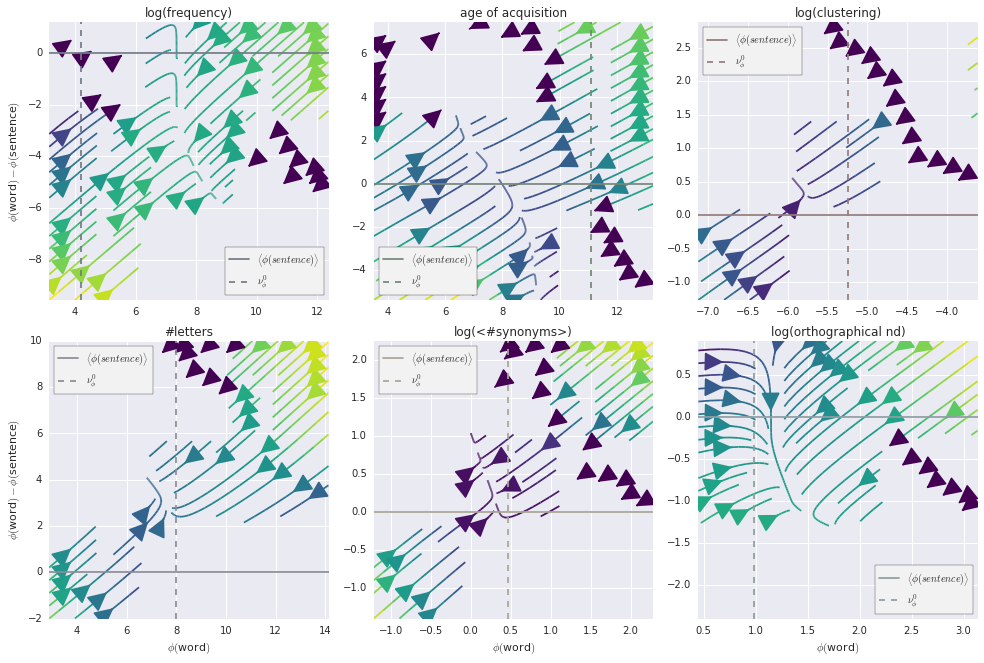

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 11 components.

Those explain the following variance:
[ 0.51636549  0.18324794  0.09025577  0.07157499  0.03303064  0.0299692
  0.02044411  0.01827479  0.01537223  0.00930633  0.00703296]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographical_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.457567,0.291722,-0.085707,0.245454,0.226212,-0.427992,0.225573,0.288748,-0.401758,0.287221,-0.159415,-0.003360
Component-1,-0.316379,0.380367,-0.128416,0.296820,0.279213,0.428161,-0.179596,0.302016,0.426282,-0.243807,0.156541,-0.014821
Component-2,0.715908,0.218417,-0.126817,0.064582,0.625594,-0.114066,-0.004996,0.042003,-0.027028,0.083977,-0.003585,-0.074514


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 19760) |           | Elapsed Time: 0:00:48 ETA:  11 days, 0:16:35

  0% (   92 of 19760) |                    | Elapsed Time: 0:00:49 ETA:  0:02:48

  1% (  209 of 19760) |                    | Elapsed Time: 0:00:50 ETA:  0:02:20

  1% (  247 of 19760) |                    | Elapsed Time: 0:00:50 ETA:  0:02:19

  1% (  350 of 19760) |                    | Elapsed Time: 0:00:51 ETA:  0:02:18

  2% (  451 of 19760) |                    | Elapsed Time: 0:00:52 ETA:  0:02:19

  2% (  494 of 19760) |                    | Elapsed Time: 0:00:52 ETA:  0:02:20

  2% (  590 of 19760) |                    | Elapsed Time: 0:00:53 ETA:  0:02:21

  3% (  707 of 19760) |                    | Elapsed Time: 0:00:54 ETA:  0:02:16

  3% (  741 of 19760) |                    | Elapsed Time: 0:00:55 ETA:  0:02:14

  4% (  826 of 19760) |                    | Elapsed Time: 0:00:56 ETA:  0:02:14

  4% (  903 of 19760) |                    | Elapsed Time: 0:00:57 ETA:  0:02:24

  5% (  988 of 19760) |#                   | Elapsed Time: 0:00:57 ETA:  0:02:20

  5% ( 1072 of 19760) |#                   | Elapsed Time: 0:00:58 ETA:  0:02:24

  5% ( 1152 of 19760) |#                   | Elapsed Time: 0:00:59 ETA:  0:02:29

  6% ( 1235 of 19760) |#                   | Elapsed Time: 0:01:00 ETA:  0:02:24

  6% ( 1353 of 19760) |#                   | Elapsed Time: 0:01:01 ETA:  0:02:17

  7% ( 1468 of 19760) |#                   | Elapsed Time: 0:01:02 ETA:  0:02:17

  7% ( 1482 of 19760) |#                   | Elapsed Time: 0:01:02 ETA:  0:02:21

  7% ( 1566 of 19760) |#                   | Elapsed Time: 0:01:03 ETA:  0:02:20

  8% ( 1648 of 19760) |#                   | Elapsed Time: 0:01:04 ETA:  0:02:18

  8% ( 1729 of 19760) |#                   | Elapsed Time: 0:01:05 ETA:  0:02:22

  9% ( 1848 of 19760) |#                   | Elapsed Time: 0:01:06 ETA:  0:02:11

 10% ( 1976 of 19760) |##                  | Elapsed Time: 0:01:07 ETA:  0:02:04

 10% ( 2064 of 19760) |##                  | Elapsed Time: 0:01:08 ETA:  0:02:11

 10% ( 2135 of 19760) |##                  | Elapsed Time: 0:01:09 ETA:  0:02:23

 11% ( 2223 of 19760) |##                  | Elapsed Time: 0:01:10 ETA:  0:02:21

 11% ( 2333 of 19760) |##                  | Elapsed Time: 0:01:11 ETA:  0:02:13

 12% ( 2439 of 19760) |##                  | Elapsed Time: 0:01:12 ETA:  0:02:06

 12% ( 2470 of 19760) |##                  | Elapsed Time: 0:01:13 ETA:  0:02:05

 13% ( 2570 of 19760) |##                  | Elapsed Time: 0:01:14 ETA:  0:02:09

 13% ( 2668 of 19760) |##                  | Elapsed Time: 0:01:15 ETA:  0:02:13

 13% ( 2717 of 19760) |##                  | Elapsed Time: 0:01:15 ETA:  0:02:12

 14% ( 2821 of 19760) |##                  | Elapsed Time: 0:01:16 ETA:  0:02:06

 14% ( 2915 of 19760) |##                  | Elapsed Time: 0:01:17 ETA:  0:01:59

 15% ( 2964 of 19760) |###                 | Elapsed Time: 0:01:18 ETA:  0:01:55

 15% ( 3060 of 19760) |###                 | Elapsed Time: 0:01:19 ETA:  0:01:58

 16% ( 3171 of 19760) |###                 | Elapsed Time: 0:01:20 ETA:  0:01:56

 16% ( 3211 of 19760) |###                 | Elapsed Time: 0:01:20 ETA:  0:01:53

 16% ( 3289 of 19760) |###                 | Elapsed Time: 0:01:21 ETA:  0:01:58

 16% ( 3354 of 19760) |###                 | Elapsed Time: 0:01:22 ETA:  0:02:07

 17% ( 3458 of 19760) |###                 | Elapsed Time: 0:01:23 ETA:  0:02:03

 18% ( 3568 of 19760) |###                 | Elapsed Time: 0:01:24 ETA:  0:02:01

 18% ( 3648 of 19760) |###                 | Elapsed Time: 0:01:25 ETA:  0:02:03

 18% ( 3705 of 19760) |###                 | Elapsed Time: 0:01:26 ETA:  0:02:03

 19% ( 3802 of 19760) |###                 | Elapsed Time: 0:01:27 ETA:  0:02:02

 19% ( 3912 of 19760) |###                 | Elapsed Time: 0:01:28 ETA:  0:02:01

 20% ( 3952 of 19760) |####                | Elapsed Time: 0:01:28 ETA:  0:02:00

 20% ( 4067 of 19760) |####                | Elapsed Time: 0:01:29 ETA:  0:01:49

 21% ( 4199 of 19760) |####                | Elapsed Time: 0:01:30 ETA:  0:01:38

 21% ( 4289 of 19760) |####                | Elapsed Time: 0:01:31 ETA:  0:01:42

 22% ( 4402 of 19760) |####                | Elapsed Time: 0:01:32 ETA:  0:01:33

 22% ( 4446 of 19760) |####                | Elapsed Time: 0:01:32 ETA:  0:01:32

 23% ( 4552 of 19760) |####                | Elapsed Time: 0:01:33 ETA:  0:01:29

 23% ( 4652 of 19760) |####                | Elapsed Time: 0:01:34 ETA:  0:01:31

 23% ( 4693 of 19760) |####                | Elapsed Time: 0:01:35 ETA:  0:01:31

 24% ( 4811 of 19760) |####                | Elapsed Time: 0:01:36 ETA:  0:01:29

 25% ( 4940 of 19760) |#####               | Elapsed Time: 0:01:37 ETA:  0:01:28

 25% ( 5043 of 19760) |#####               | Elapsed Time: 0:01:38 ETA:  0:01:24

 26% ( 5150 of 19760) |#####               | Elapsed Time: 0:01:39 ETA:  0:01:24

 26% ( 5187 of 19760) |#####               | Elapsed Time: 0:01:39 ETA:  0:01:24

 26% ( 5296 of 19760) |#####               | Elapsed Time: 0:01:40 ETA:  0:01:23

 27% ( 5406 of 19760) |#####               | Elapsed Time: 0:01:41 ETA:  0:01:19

 27% ( 5434 of 19760) |#####               | Elapsed Time: 0:01:42 ETA:  0:01:20

 28% ( 5559 of 19760) |#####               | Elapsed Time: 0:01:43 ETA:  0:01:17

 28% ( 5616 of 19760) |#####               | Elapsed Time: 0:01:44 ETA:  0:01:30

 28% ( 5681 of 19760) |#####               | Elapsed Time: 0:01:44 ETA:  0:01:33

 29% ( 5788 of 19760) |#####               | Elapsed Time: 0:01:45 ETA:  0:01:31

 29% ( 5884 of 19760) |#####               | Elapsed Time: 0:01:46 ETA:  0:01:33

 30% ( 5928 of 19760) |######              | Elapsed Time: 0:01:47 ETA:  0:01:32

 30% ( 6018 of 19760) |######              | Elapsed Time: 0:01:48 ETA:  0:01:37

 30% ( 6089 of 19760) |######              | Elapsed Time: 0:01:49 ETA:  0:01:47

 31% ( 6175 of 19760) |######              | Elapsed Time: 0:01:50 ETA:  0:01:45

 31% ( 6247 of 19760) |######              | Elapsed Time: 0:01:51 ETA:  0:02:01

 32% ( 6324 of 19760) |######              | Elapsed Time: 0:01:52 ETA:  0:01:53

 32% ( 6422 of 19760) |######              | Elapsed Time: 0:01:53 ETA:  0:01:49

 33% ( 6532 of 19760) |######              | Elapsed Time: 0:01:54 ETA:  0:01:47

 33% ( 6669 of 19760) |######              | Elapsed Time: 0:01:55 ETA:  0:01:39

 34% ( 6770 of 19760) |######              | Elapsed Time: 0:01:56 ETA:  0:01:34

 34% ( 6876 of 19760) |######              | Elapsed Time: 0:01:57 ETA:  0:01:24

 35% ( 6916 of 19760) |#######             | Elapsed Time: 0:01:57 ETA:  0:01:27

 35% ( 7033 of 19760) |#######             | Elapsed Time: 0:01:58 ETA:  0:01:14

 35% ( 7101 of 19760) |#######             | Elapsed Time: 0:01:59 ETA:  0:01:16

 36% ( 7163 of 19760) |#######             | Elapsed Time: 0:02:00 ETA:  0:01:19

 36% ( 7267 of 19760) |#######             | Elapsed Time: 0:02:01 ETA:  0:01:19

 37% ( 7365 of 19760) |#######             | Elapsed Time: 0:02:02 ETA:  0:01:25

 37% ( 7410 of 19760) |#######             | Elapsed Time: 0:02:03 ETA:  0:01:26

 38% ( 7512 of 19760) |#######             | Elapsed Time: 0:02:04 ETA:  0:01:24

 38% ( 7601 of 19760) |#######             | Elapsed Time: 0:02:05 ETA:  0:01:28

 38% ( 7657 of 19760) |#######             | Elapsed Time: 0:02:05 ETA:  0:01:24

 39% ( 7766 of 19760) |#######             | Elapsed Time: 0:02:06 ETA:  0:01:25

 39% ( 7870 of 19760) |#######             | Elapsed Time: 0:02:07 ETA:  0:01:14

 40% ( 7904 of 19760) |########            | Elapsed Time: 0:02:08 ETA:  0:01:08

 40% ( 8011 of 19760) |########            | Elapsed Time: 0:02:09 ETA:  0:01:06

 40% ( 8099 of 19760) |########            | Elapsed Time: 0:02:10 ETA:  0:01:07

 41% ( 8151 of 19760) |########            | Elapsed Time: 0:02:10 ETA:  0:01:06

 41% ( 8271 of 19760) |########            | Elapsed Time: 0:02:11 ETA:  0:01:01

 42% ( 8398 of 19760) |########            | Elapsed Time: 0:02:12 ETA:  0:00:54

 43% ( 8515 of 19760) |########            | Elapsed Time: 0:02:13 ETA:  0:00:51

 43% ( 8645 of 19760) |########            | Elapsed Time: 0:02:15 ETA:  0:00:48

 44% ( 8749 of 19760) |########            | Elapsed Time: 0:02:16 ETA:  0:00:48

 44% ( 8856 of 19760) |########            | Elapsed Time: 0:02:17 ETA:  0:00:42

 45% ( 8892 of 19760) |#########           | Elapsed Time: 0:02:17 ETA:  0:00:39

 45% ( 9008 of 19760) |#########           | Elapsed Time: 0:02:18 ETA:  0:00:39

 46% ( 9107 of 19760) |#########           | Elapsed Time: 0:02:19 ETA:  0:00:42

 46% ( 9139 of 19760) |#########           | Elapsed Time: 0:02:19 ETA:  0:00:40

 46% ( 9244 of 19760) |#########           | Elapsed Time: 0:02:20 ETA:  0:00:42

 47% ( 9359 of 19760) |#########           | Elapsed Time: 0:02:21 ETA:  0:00:40

 47% ( 9386 of 19760) |#########           | Elapsed Time: 0:02:22 ETA:  0:00:44

 48% ( 9488 of 19760) |#########           | Elapsed Time: 0:02:23 ETA:  0:00:43

 48% ( 9572 of 19760) |#########           | Elapsed Time: 0:02:24 ETA:  0:00:48

 48% ( 9633 of 19760) |#########           | Elapsed Time: 0:02:24 ETA:  0:00:49

 49% ( 9741 of 19760) |#########           | Elapsed Time: 0:02:25 ETA:  0:00:50

 49% ( 9830 of 19760) |#########           | Elapsed Time: 0:02:26 ETA:  0:00:52

 50% ( 9880 of 19760) |##########          | Elapsed Time: 0:02:27 ETA:  0:00:53

 50% (10009 of 19760) |##########          | Elapsed Time: 0:02:28 ETA:  0:00:46

 51% (10127 of 19760) |##########          | Elapsed Time: 0:02:29 ETA:  0:00:43

 51% (10250 of 19760) |##########          | Elapsed Time: 0:02:30 ETA:  0:00:37

 52% (10374 of 19760) |##########          | Elapsed Time: 0:02:31 ETA:  0:00:27

 53% (10476 of 19760) |##########          | Elapsed Time: 0:02:32 ETA:  0:00:28

 53% (10553 of 19760) |##########          | Elapsed Time: 0:02:33 ETA:  0:00:30

 53% (10621 of 19760) |##########          | Elapsed Time: 0:02:34 ETA:  0:00:31

 54% (10718 of 19760) |##########          | Elapsed Time: 0:02:35 ETA:  0:00:39

 54% (10823 of 19760) |##########          | Elapsed Time: 0:02:36 ETA:  0:00:40

 55% (10868 of 19760) |###########         | Elapsed Time: 0:02:36 ETA:  0:00:37

 55% (10989 of 19760) |###########         | Elapsed Time: 0:02:37 ETA:  0:00:36

 56% (11115 of 19760) |###########         | Elapsed Time: 0:02:38 ETA:  0:00:36

 56% (11228 of 19760) |###########         | Elapsed Time: 0:02:39 ETA:  0:00:32

 57% (11362 of 19760) |###########         | Elapsed Time: 0:02:40 ETA:  0:00:16

 58% (11489 of 19760) |###########         | Elapsed Time: 0:02:41 ETA:  0:00:08

 58% (11609 of 19760) |###########         | Elapsed Time: 0:02:42 ETA:  0:00:00

 59% (11715 of 19760) |###########         | Elapsed Time: 0:02:43 ETA:  0:00:03

 59% (11821 of 19760) |###########         | Elapsed Time: 0:02:44 ETA:  0:00:05

 60% (11856 of 19760) |############        | Elapsed Time: 0:02:45 ETA:  0:00:03

 60% (11969 of 19760) |############        | Elapsed Time: 0:02:46 ETA:  0:00:04

 61% (12080 of 19760) |############        | Elapsed Time: 0:02:47 ETA:  0:00:03

 61% (12103 of 19760) |############        | Elapsed Time: 0:02:47 ETA:  0:00:10

 61% (12237 of 19760) |############        | Elapsed Time: 0:02:48 ETA:  0:00:07

 62% (12350 of 19760) |############        | Elapsed Time: 0:02:49 ETA:  0:00:06

 63% (12457 of 19760) |############        | Elapsed Time: 0:02:50 ETA:  0:00:06

 63% (12574 of 19760) |############        | Elapsed Time: 0:02:51 ETA:  0:00:03

 63% (12597 of 19760) |############        | Elapsed Time: 0:02:51 ETA:  0:00:01

 64% (12698 of 19760) |############        | Elapsed Time: 0:02:52 ETA:  0:00:02

 64% (12811 of 19760) |############        | Elapsed Time: 0:02:53 ETA:  0:00:01

 65% (12844 of 19760) |#############       | Elapsed Time: 0:02:53 ETA:  0:00:01

 65% (12952 of 19760) |#############       | Elapsed Time: 0:02:54 ETA:  0:00:00

 66% (13058 of 19760) |#############       | Elapsed Time: 0:02:55 ETA:  0:00:05

 66% (13091 of 19760) |#############       | Elapsed Time: 0:02:56 ETA:  0:00:07

 66% (13186 of 19760) |#############       | Elapsed Time: 0:02:57 ETA:  0:00:09

 67% (13293 of 19760) |#############       | Elapsed Time: 0:02:58 ETA:  0:00:10

 67% (13338 of 19760) |#############       | Elapsed Time: 0:02:58 ETA:  0:00:09

 68% (13462 of 19760) |#############       | Elapsed Time: 0:02:59 ETA:  0:00:03

 68% (13585 of 19760) |#############       | Elapsed Time: 0:03:00 ETA:  0:00:02

 69% (13695 of 19760) |#############       | Elapsed Time: 0:03:01 ETA:  0:00:00

 69% (13788 of 19760) |#############       | Elapsed Time: 0:03:02 ETA:  0:00:03

 70% (13832 of 19760) |##############      | Elapsed Time: 0:03:03 ETA:  0:00:04

 70% (13943 of 19760) |##############      | Elapsed Time: 0:03:04 ETA:  0:00:00

 71% (14045 of 19760) |##############      | Elapsed Time: 0:03:05 ETA:  0:00:00

 71% (14079 of 19760) |##############      | Elapsed Time: 0:03:05 ETA:  0:00:00

 71% (14223 of 19760) |##############      | Elapsed Time: 0:03:06 ETA:  0:00:00

 72% (14326 of 19760) |##############      | Elapsed Time: 0:03:07 ETA:  0:00:00

 72% (14419 of 19760) |##############      | Elapsed Time: 0:03:08 ETA:  0:00:00

 73% (14525 of 19760) |##############      | Elapsed Time: 0:03:09 ETA:  0:00:00

 73% (14573 of 19760) |##############      | Elapsed Time: 0:03:09 ETA:  0:00:00

 74% (14700 of 19760) |##############      | Elapsed Time: 0:03:10 ETA:  0:00:00

 75% (14820 of 19760) |###############     | Elapsed Time: 0:03:12 ETA:  0:00:00

 75% (14901 of 19760) |###############     | Elapsed Time: 0:03:13 ETA:  0:00:00

 75% (14996 of 19760) |###############     | Elapsed Time: 0:03:14 ETA:  0:00:00

 76% (15067 of 19760) |###############     | Elapsed Time: 0:03:14 ETA:  0:00:03

 76% (15137 of 19760) |###############     | Elapsed Time: 0:03:15 ETA:  0:00:08

 76% (15201 of 19760) |###############     | Elapsed Time: 0:03:16 ETA:  0:00:20

 77% (15314 of 19760) |###############     | Elapsed Time: 0:03:17 ETA:  0:00:27

 77% (15410 of 19760) |###############     | Elapsed Time: 0:03:18 ETA:  0:00:30

 78% (15539 of 19760) |###############     | Elapsed Time: 0:03:19 ETA:  0:00:17

 78% (15561 of 19760) |###############     | Elapsed Time: 0:03:20 ETA:  0:00:12

 79% (15647 of 19760) |###############     | Elapsed Time: 0:03:21 ETA:  0:00:14

 79% (15733 of 19760) |###############     | Elapsed Time: 0:03:22 ETA:  0:00:15

 80% (15808 of 19760) |################    | Elapsed Time: 0:03:22 ETA:  0:00:02

 80% (15917 of 19760) |################    | Elapsed Time: 0:03:23 ETA:  0:00:00

 81% (16032 of 19760) |################    | Elapsed Time: 0:03:24 ETA:  0:00:00

 81% (16055 of 19760) |################    | Elapsed Time: 0:03:25 ETA:  0:00:00

 81% (16174 of 19760) |################    | Elapsed Time: 0:03:26 ETA:  0:00:00

 82% (16302 of 19760) |################    | Elapsed Time: 0:03:27 ETA:  0:00:00

 83% (16417 of 19760) |################    | Elapsed Time: 0:03:28 ETA:  0:00:00

 83% (16549 of 19760) |################    | Elapsed Time: 0:03:29 ETA:  0:00:00

 84% (16673 of 19760) |################    | Elapsed Time: 0:03:30 ETA:  0:00:00

 85% (16796 of 19760) |#################   | Elapsed Time: 0:03:31 ETA:  0:00:00

 85% (16904 of 19760) |#################   | Elapsed Time: 0:03:32 ETA:  0:00:00

 86% (17018 of 19760) |#################   | Elapsed Time: 0:03:33 ETA:  0:00:00

 86% (17043 of 19760) |#################   | Elapsed Time: 0:03:33 ETA:  0:00:00

 86% (17136 of 19760) |#################   | Elapsed Time: 0:03:34 ETA:  0:00:00

 87% (17270 of 19760) |#################   | Elapsed Time: 0:03:35 ETA:  0:00:00

 87% (17290 of 19760) |#################   | Elapsed Time: 0:03:36 ETA:  0:00:00

 88% (17422 of 19760) |#################   | Elapsed Time: 0:03:37 ETA:  0:00:00

 88% (17537 of 19760) |#################   | Elapsed Time: 0:03:38 ETA:  0:00:00

 89% (17648 of 19760) |#################   | Elapsed Time: 0:03:39 ETA:  0:00:00

 89% (17759 of 19760) |#################   | Elapsed Time: 0:03:40 ETA:  0:00:00

 90% (17784 of 19760) |##################  | Elapsed Time: 0:03:40 ETA:  0:00:00

 90% (17857 of 19760) |##################  | Elapsed Time: 0:03:41 ETA:  0:00:00

 90% (17966 of 19760) |##################  | Elapsed Time: 0:03:42 ETA:  0:00:00

 91% (18031 of 19760) |##################  | Elapsed Time: 0:03:42 ETA:  0:00:00

 91% (18136 of 19760) |##################  | Elapsed Time: 0:03:43 ETA:  0:00:00

 92% (18250 of 19760) |##################  | Elapsed Time: 0:03:45 ETA:  0:00:00

 92% (18278 of 19760) |##################  | Elapsed Time: 0:03:45 ETA:  0:00:00

 93% (18408 of 19760) |##################  | Elapsed Time: 0:03:46 ETA:  0:00:00

 93% (18525 of 19760) |##################  | Elapsed Time: 0:03:47 ETA:  0:00:00

 94% (18628 of 19760) |##################  | Elapsed Time: 0:03:48 ETA:  0:00:00

 94% (18724 of 19760) |##################  | Elapsed Time: 0:03:49 ETA:  0:00:00

 95% (18772 of 19760) |################### | Elapsed Time: 0:03:49 ETA:  0:00:00

 95% (18848 of 19760) |################### | Elapsed Time: 0:03:50 ETA:  0:00:00

 96% (18982 of 19760) |################### | Elapsed Time: 0:03:51 ETA:  0:00:00

 96% (19019 of 19760) |################### | Elapsed Time: 0:03:51 ETA:  0:00:00

 96% (19143 of 19760) |################### | Elapsed Time: 0:03:52 ETA:  0:00:00

 97% (19266 of 19760) |################### | Elapsed Time: 0:03:54 ETA:  0:00:00

 98% (19387 of 19760) |################### | Elapsed Time: 0:03:55 ETA:  0:00:00

 98% (19513 of 19760) |################### | Elapsed Time: 0:03:56 ETA:  0:00:00

 99% (19638 of 19760) |################### | Elapsed Time: 0:03:57 ETA:  0:00:00

100% (19760 of 19760) |####################| Elapsed Time: 0:03:58 Time: 0:03:58


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

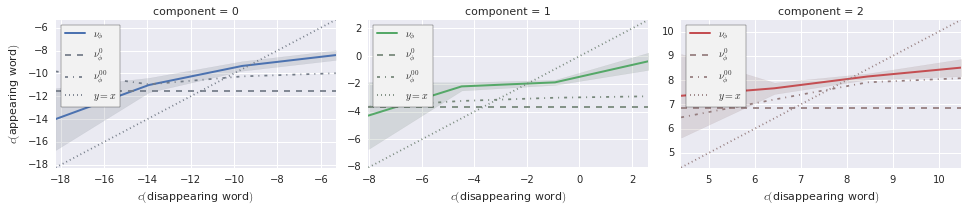

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 5 components.

Those explain the following variance:
[ 0.5395369   0.1874926   0.16385877  0.04362133  0.03686285]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographical_density,synonyms_count
Component-0,-0.692631,-0.096784,0.337792,-0.558782,0.290765,0.003151
Component-1,-0.495610,-0.092634,0.388185,0.715532,-0.287536,0.020945
Component-2,0.514883,-0.110772,0.840265,-0.112860,-0.002758,-0.061922


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 19760) |            | Elapsed Time: 0:00:13 ETA:  3 days, 1:23:09

  0% (  114 of 19760) |                    | Elapsed Time: 0:00:14 ETA:  0:02:41

  1% (  247 of 19760) |                    | Elapsed Time: 0:00:15 ETA:  0:02:26

  1% (  356 of 19760) |                    | Elapsed Time: 0:00:16 ETA:  0:02:31

  2% (  494 of 19760) |                    | Elapsed Time: 0:00:17 ETA:  0:02:30

  3% (  599 of 19760) |                    | Elapsed Time: 0:00:18 ETA:  0:02:32

  3% (  741 of 19760) |                    | Elapsed Time: 0:00:19 ETA:  0:02:30

  4% (  830 of 19760) |                    | Elapsed Time: 0:00:20 ETA:  0:02:35

  4% (  923 of 19760) |                    | Elapsed Time: 0:00:21 ETA:  0:02:38

  5% (  988 of 19760) |#                   | Elapsed Time: 0:00:22 ETA:  0:02:40

  5% ( 1094 of 19760) |#                   | Elapsed Time: 0:00:23 ETA:  0:02:40

  6% ( 1235 of 19760) |#                   | Elapsed Time: 0:00:24 ETA:  0:02:35

  6% ( 1372 of 19760) |#                   | Elapsed Time: 0:00:25 ETA:  0:02:26

  7% ( 1482 of 19760) |#                   | Elapsed Time: 0:00:26 ETA:  0:02:23

  8% ( 1593 of 19760) |#                   | Elapsed Time: 0:00:27 ETA:  0:02:24

  8% ( 1729 of 19760) |#                   | Elapsed Time: 0:00:28 ETA:  0:02:12

  9% ( 1870 of 19760) |#                   | Elapsed Time: 0:00:29 ETA:  0:02:08

 10% ( 1976 of 19760) |##                  | Elapsed Time: 0:00:30 ETA:  0:02:03

 10% ( 2081 of 19760) |##                  | Elapsed Time: 0:00:31 ETA:  0:02:07

 11% ( 2176 of 19760) |##                  | Elapsed Time: 0:00:32 ETA:  0:02:12

 11% ( 2223 of 19760) |##                  | Elapsed Time: 0:00:32 ETA:  0:02:14

 11% ( 2353 of 19760) |##                  | Elapsed Time: 0:00:33 ETA:  0:02:13

 12% ( 2470 of 19760) |##                  | Elapsed Time: 0:00:34 ETA:  0:02:09

 13% ( 2593 of 19760) |##                  | Elapsed Time: 0:00:35 ETA:  0:02:06

 13% ( 2717 of 19760) |##                  | Elapsed Time: 0:00:36 ETA:  0:02:11

 14% ( 2827 of 19760) |##                  | Elapsed Time: 0:00:37 ETA:  0:02:14

 14% ( 2931 of 19760) |##                  | Elapsed Time: 0:00:38 ETA:  0:02:13

 15% ( 2964 of 19760) |###                 | Elapsed Time: 0:00:38 ETA:  0:02:08

 15% ( 3085 of 19760) |###                 | Elapsed Time: 0:00:39 ETA:  0:02:07

 16% ( 3211 of 19760) |###                 | Elapsed Time: 0:00:40 ETA:  0:02:09

 16% ( 3314 of 19760) |###                 | Elapsed Time: 0:00:41 ETA:  0:02:13

 17% ( 3429 of 19760) |###                 | Elapsed Time: 0:00:42 ETA:  0:02:12

 17% ( 3458 of 19760) |###                 | Elapsed Time: 0:00:43 ETA:  0:02:11

 18% ( 3587 of 19760) |###                 | Elapsed Time: 0:00:44 ETA:  0:02:06

 18% ( 3682 of 19760) |###                 | Elapsed Time: 0:00:45 ETA:  0:02:06

 18% ( 3705 of 19760) |###                 | Elapsed Time: 0:00:45 ETA:  0:02:07

 19% ( 3818 of 19760) |###                 | Elapsed Time: 0:00:46 ETA:  0:02:08

 20% ( 3952 of 19760) |####                | Elapsed Time: 0:00:47 ETA:  0:02:05

 20% ( 4081 of 19760) |####                | Elapsed Time: 0:00:48 ETA:  0:01:58

 21% ( 4199 of 19760) |####                | Elapsed Time: 0:00:49 ETA:  0:01:54

 21% ( 4327 of 19760) |####                | Elapsed Time: 0:00:50 ETA:  0:01:52

 22% ( 4446 of 19760) |####                | Elapsed Time: 0:00:51 ETA:  0:01:51

 23% ( 4575 of 19760) |####                | Elapsed Time: 0:00:52 ETA:  0:01:43

 23% ( 4693 of 19760) |####                | Elapsed Time: 0:00:52 ETA:  0:01:41

 24% ( 4830 of 19760) |####                | Elapsed Time: 0:00:53 ETA:  0:01:36

 25% ( 4940 of 19760) |#####               | Elapsed Time: 0:00:54 ETA:  0:01:35

 25% ( 5068 of 19760) |#####               | Elapsed Time: 0:00:55 ETA:  0:01:35

 26% ( 5187 of 19760) |#####               | Elapsed Time: 0:00:56 ETA:  0:01:33

 26% ( 5322 of 19760) |#####               | Elapsed Time: 0:00:57 ETA:  0:01:31

 27% ( 5434 of 19760) |#####               | Elapsed Time: 0:00:58 ETA:  0:01:31

 28% ( 5567 of 19760) |#####               | Elapsed Time: 0:00:59 ETA:  0:01:30

 28% ( 5636 of 19760) |#####               | Elapsed Time: 0:01:00 ETA:  0:01:38

 28% ( 5681 of 19760) |#####               | Elapsed Time: 0:01:00 ETA:  0:01:39

 29% ( 5787 of 19760) |#####               | Elapsed Time: 0:01:02 ETA:  0:01:44

 29% ( 5884 of 19760) |#####               | Elapsed Time: 0:01:03 ETA:  0:01:49

 30% ( 5928 of 19760) |######              | Elapsed Time: 0:01:03 ETA:  0:01:53

 30% ( 6025 of 19760) |######              | Elapsed Time: 0:01:04 ETA:  0:02:00

 31% ( 6126 of 19760) |######              | Elapsed Time: 0:01:05 ETA:  0:02:07

 31% ( 6175 of 19760) |######              | Elapsed Time: 0:01:06 ETA:  0:02:13

 31% ( 6255 of 19760) |######              | Elapsed Time: 0:01:07 ETA:  0:02:28

 32% ( 6325 of 19760) |######              | Elapsed Time: 0:01:08 ETA:  0:02:26

 32% ( 6422 of 19760) |######              | Elapsed Time: 0:01:09 ETA:  0:02:37

 33% ( 6526 of 19760) |######              | Elapsed Time: 0:01:10 ETA:  0:02:33

 33% ( 6640 of 19760) |######              | Elapsed Time: 0:01:11 ETA:  0:02:24

 33% ( 6669 of 19760) |######              | Elapsed Time: 0:01:11 ETA:  0:02:25

 34% ( 6775 of 19760) |######              | Elapsed Time: 0:01:12 ETA:  0:02:22

 34% ( 6884 of 19760) |######              | Elapsed Time: 0:01:13 ETA:  0:02:15

 35% ( 6916 of 19760) |#######             | Elapsed Time: 0:01:13 ETA:  0:02:09

 35% ( 7045 of 19760) |#######             | Elapsed Time: 0:01:14 ETA:  0:01:51

 36% ( 7116 of 19760) |#######             | Elapsed Time: 0:01:15 ETA:  0:01:53

 36% ( 7163 of 19760) |#######             | Elapsed Time: 0:01:16 ETA:  0:01:53

 36% ( 7283 of 19760) |#######             | Elapsed Time: 0:01:17 ETA:  0:01:48

 37% ( 7410 of 19760) |#######             | Elapsed Time: 0:01:18 ETA:  0:01:48

 38% ( 7517 of 19760) |#######             | Elapsed Time: 0:01:19 ETA:  0:01:47

 38% ( 7617 of 19760) |#######             | Elapsed Time: 0:01:20 ETA:  0:01:48

 38% ( 7657 of 19760) |#######             | Elapsed Time: 0:01:21 ETA:  0:01:48

 39% ( 7781 of 19760) |#######             | Elapsed Time: 0:01:22 ETA:  0:01:49

 40% ( 7904 of 19760) |########            | Elapsed Time: 0:01:23 ETA:  0:01:34

 40% ( 8019 of 19760) |########            | Elapsed Time: 0:01:24 ETA:  0:01:34

 41% ( 8120 of 19760) |########            | Elapsed Time: 0:01:25 ETA:  0:01:36

 41% ( 8151 of 19760) |########            | Elapsed Time: 0:01:25 ETA:  0:01:36

 41% ( 8270 of 19760) |########            | Elapsed Time: 0:01:26 ETA:  0:01:32

 42% ( 8398 of 19760) |########            | Elapsed Time: 0:01:27 ETA:  0:01:24

 43% ( 8526 of 19760) |########            | Elapsed Time: 0:01:28 ETA:  0:01:22

 43% ( 8645 of 19760) |########            | Elapsed Time: 0:01:29 ETA:  0:01:19

 44% ( 8745 of 19760) |########            | Elapsed Time: 0:01:30 ETA:  0:01:22

 44% ( 8839 of 19760) |########            | Elapsed Time: 0:01:31 ETA:  0:01:25

 45% ( 8892 of 19760) |#########           | Elapsed Time: 0:01:31 ETA:  0:01:24

 45% ( 9022 of 19760) |#########           | Elapsed Time: 0:01:32 ETA:  0:01:19

 46% ( 9139 of 19760) |#########           | Elapsed Time: 0:01:33 ETA:  0:01:17

 46% ( 9250 of 19760) |#########           | Elapsed Time: 0:01:34 ETA:  0:01:18

 47% ( 9386 of 19760) |#########           | Elapsed Time: 0:01:36 ETA:  0:01:17

 48% ( 9518 of 19760) |#########           | Elapsed Time: 0:01:37 ETA:  0:01:15

 48% ( 9633 of 19760) |#########           | Elapsed Time: 0:01:37 ETA:  0:01:08

 49% ( 9749 of 19760) |#########           | Elapsed Time: 0:01:38 ETA:  0:01:03

 50% ( 9880 of 19760) |##########          | Elapsed Time: 0:01:40 ETA:  0:01:03

 50% (10007 of 19760) |##########          | Elapsed Time: 0:01:41 ETA:  0:01:02

 51% (10127 of 19760) |##########          | Elapsed Time: 0:01:42 ETA:  0:01:05

 51% (10251 of 19760) |##########          | Elapsed Time: 0:01:43 ETA:  0:01:03

 52% (10374 of 19760) |##########          | Elapsed Time: 0:01:44 ETA:  0:01:10

 53% (10476 of 19760) |##########          | Elapsed Time: 0:01:45 ETA:  0:01:13

 53% (10569 of 19760) |##########          | Elapsed Time: 0:01:46 ETA:  0:01:17

 53% (10621 of 19760) |##########          | Elapsed Time: 0:01:47 ETA:  0:01:17

 54% (10722 of 19760) |##########          | Elapsed Time: 0:01:48 ETA:  0:01:23

 55% (10868 of 19760) |###########         | Elapsed Time: 0:01:49 ETA:  0:01:14

 55% (10992 of 19760) |###########         | Elapsed Time: 0:01:50 ETA:  0:01:13

 56% (11115 of 19760) |###########         | Elapsed Time: 0:01:51 ETA:  0:01:10

 56% (11223 of 19760) |###########         | Elapsed Time: 0:01:52 ETA:  0:01:08

 57% (11362 of 19760) |###########         | Elapsed Time: 0:01:53 ETA:  0:00:58

 58% (11490 of 19760) |###########         | Elapsed Time: 0:01:54 ETA:  0:00:51

 58% (11609 of 19760) |###########         | Elapsed Time: 0:01:55 ETA:  0:00:52

 59% (11720 of 19760) |###########         | Elapsed Time: 0:01:56 ETA:  0:00:54

 60% (11856 of 19760) |############        | Elapsed Time: 0:01:57 ETA:  0:00:51

 60% (11985 of 19760) |############        | Elapsed Time: 0:01:58 ETA:  0:00:45

 61% (12103 of 19760) |############        | Elapsed Time: 0:01:59 ETA:  0:00:38

 62% (12269 of 19760) |############        | Elapsed Time: 0:02:00 ETA:  0:00:29

 62% (12350 of 19760) |############        | Elapsed Time: 0:02:01 ETA:  0:00:30

 63% (12478 of 19760) |############        | Elapsed Time: 0:02:02 ETA:  0:00:26

 63% (12597 of 19760) |############        | Elapsed Time: 0:02:02 ETA:  0:00:24

 64% (12727 of 19760) |############        | Elapsed Time: 0:02:03 ETA:  0:00:20

 65% (12844 of 19760) |#############       | Elapsed Time: 0:02:04 ETA:  0:00:18

 65% (12970 of 19760) |#############       | Elapsed Time: 0:02:05 ETA:  0:00:19

 66% (13091 of 19760) |#############       | Elapsed Time: 0:02:06 ETA:  0:00:17

 66% (13214 of 19760) |#############       | Elapsed Time: 0:02:07 ETA:  0:00:20

 67% (13338 of 19760) |#############       | Elapsed Time: 0:02:08 ETA:  0:00:22

 68% (13484 of 19760) |#############       | Elapsed Time: 0:02:09 ETA:  0:00:18

 68% (13585 of 19760) |#############       | Elapsed Time: 0:02:10 ETA:  0:00:16

 69% (13717 of 19760) |#############       | Elapsed Time: 0:02:11 ETA:  0:00:16

 70% (13832 of 19760) |##############      | Elapsed Time: 0:02:12 ETA:  0:00:16

 70% (13973 of 19760) |##############      | Elapsed Time: 0:02:13 ETA:  0:00:14

 71% (14079 of 19760) |##############      | Elapsed Time: 0:02:14 ETA:  0:00:12

 72% (14249 of 19760) |##############      | Elapsed Time: 0:02:15 ETA:  0:00:07

 72% (14326 of 19760) |##############      | Elapsed Time: 0:02:15 ETA:  0:00:05

 73% (14469 of 19760) |##############      | Elapsed Time: 0:02:16 ETA:  0:00:04

 73% (14573 of 19760) |##############      | Elapsed Time: 0:02:17 ETA:  0:00:05

 74% (14723 of 19760) |##############      | Elapsed Time: 0:02:18 ETA:  0:00:02

 75% (14820 of 19760) |###############     | Elapsed Time: 0:02:19 ETA:  0:00:01

 75% (14931 of 19760) |###############     | Elapsed Time: 0:02:20 ETA:  0:00:02

 76% (15067 of 19760) |###############     | Elapsed Time: 0:02:21 ETA:  0:00:03

 76% (15185 of 19760) |###############     | Elapsed Time: 0:02:22 ETA:  0:00:10

 77% (15314 of 19760) |###############     | Elapsed Time: 0:02:23 ETA:  0:00:08

 78% (15454 of 19760) |###############     | Elapsed Time: 0:02:24 ETA:  0:00:08

 78% (15561 of 19760) |###############     | Elapsed Time: 0:02:24 ETA:  0:00:05

 79% (15697 of 19760) |###############     | Elapsed Time: 0:02:25 ETA:  0:00:06

 80% (15808 of 19760) |################    | Elapsed Time: 0:02:26 ETA:  0:00:07

 80% (15967 of 19760) |################    | Elapsed Time: 0:02:27 ETA:  0:00:00

 81% (16055 of 19760) |################    | Elapsed Time: 0:02:28 ETA:  0:00:00

 81% (16201 of 19760) |################    | Elapsed Time: 0:02:29 ETA:  0:00:00

 82% (16302 of 19760) |################    | Elapsed Time: 0:02:30 ETA:  0:00:00

 83% (16437 of 19760) |################    | Elapsed Time: 0:02:31 ETA:  0:00:00

 83% (16549 of 19760) |################    | Elapsed Time: 0:02:32 ETA:  0:00:00

 84% (16693 of 19760) |################    | Elapsed Time: 0:02:33 ETA:  0:00:00

 85% (16796 of 19760) |#################   | Elapsed Time: 0:02:33 ETA:  0:00:00

 85% (16932 of 19760) |#################   | Elapsed Time: 0:02:34 ETA:  0:00:00

 86% (17043 of 19760) |#################   | Elapsed Time: 0:02:35 ETA:  0:00:00

 86% (17184 of 19760) |#################   | Elapsed Time: 0:02:36 ETA:  0:00:00

 87% (17290 of 19760) |#################   | Elapsed Time: 0:02:37 ETA:  0:00:00

 88% (17444 of 19760) |#################   | Elapsed Time: 0:02:38 ETA:  0:00:00

 88% (17537 of 19760) |#################   | Elapsed Time: 0:02:39 ETA:  0:00:00

 89% (17679 of 19760) |#################   | Elapsed Time: 0:02:40 ETA:  0:00:00

 90% (17784 of 19760) |##################  | Elapsed Time: 0:02:41 ETA:  0:00:00

 90% (17891 of 19760) |##################  | Elapsed Time: 0:02:42 ETA:  0:00:00

 91% (18031 of 19760) |##################  | Elapsed Time: 0:02:43 ETA:  0:00:00

 91% (18171 of 19760) |##################  | Elapsed Time: 0:02:44 ETA:  0:00:00

 92% (18278 of 19760) |##################  | Elapsed Time: 0:02:44 ETA:  0:00:00

 93% (18416 of 19760) |##################  | Elapsed Time: 0:02:45 ETA:  0:00:00

 93% (18525 of 19760) |##################  | Elapsed Time: 0:02:46 ETA:  0:00:00

 94% (18658 of 19760) |##################  | Elapsed Time: 0:02:47 ETA:  0:00:00

 95% (18772 of 19760) |################### | Elapsed Time: 0:02:48 ETA:  0:00:00

 95% (18875 of 19760) |################### | Elapsed Time: 0:02:49 ETA:  0:00:00

 96% (19019 of 19760) |################### | Elapsed Time: 0:02:50 ETA:  0:00:00

 96% (19154 of 19760) |################### | Elapsed Time: 0:02:51 ETA:  0:00:00

 97% (19266 of 19760) |################### | Elapsed Time: 0:02:52 ETA:  0:00:00

 98% (19395 of 19760) |################### | Elapsed Time: 0:02:53 ETA:  0:00:00

 98% (19513 of 19760) |################### | Elapsed Time: 0:02:54 ETA:  0:00:00

 99% (19631 of 19760) |################### | Elapsed Time: 0:02:55 ETA:  0:00:00

100% (19760 of 19760) |####################| Elapsed Time: 0:02:56 Time: 0:02:56


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

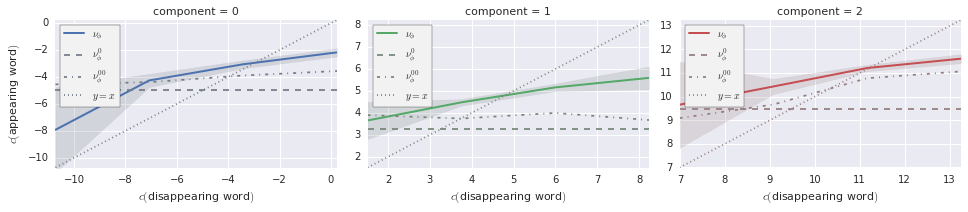

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographical_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1982 (cluster-unique) substitutions, but the PCA is in fact computed on 650 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.